In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
hospital_chosen_zip = pd.read_csv('../data/hospital_chosen_zip.csv', sep='|')

grouped_hospital = hospital_chosen_zip.groupby('zip')
group_names = grouped_hospital.groups.keys()

In [62]:
hospital_chosen_zip.describe()

,Unnamed: 0,zip,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,...,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,icu_patients_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum,percent_inpatient_beds
count,204439.000000,204439.000000,204028.000000,199862.000000,200724.000000,204439.000000,202323.000000,202377.000000,202034.000000,202347.000000,...,203488.000000,198983.000000,203547.000000,199805.000000,200702.000000,200558.000000,149523.000000,149542.000000,149506.000000,204439.000000
mean,105547.755917,53798.146606,1175.345306,1062.262161,913.418694,709.409971,655.451264,94.812953,82.441124,2.043579,...,154.865909,121.239493,108.752323,88.148715,23.188613,21.033143,0.538466,0.086584,0.695383,0.631634
std,60174.721015,26799.951939,1668.755236,1485.984197,1292.195459,1121.410794,1022.849105,182.701440,167.810329,104.602630,...,281.721068,206.907009,214.351106,185.868358,47.256148,44.076477,6.420238,1.169915,9.875485,1.245174
min,0.000000,603.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,-40.000000,...,0.000000,0.000000,-20.000000,-12.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.006133
25%,53812.500000,33016.000000,203.000000,182.000000,163.000000,72.000000,66.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.406856
50%,105754.000000,55033.000000,510.000000,469.000000,393.000000,248.000000,227.000000,26.000000,21.000000,0.000000,...,51.000000,49.000000,31.000000,29.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.621461
75%,157605.500000,75965.000000,1546.000000,1400.000000,1183.000000,919.000000,863.000000,107.000000,90.000000,0.000000,...,168.000000,145.000000,116.000000,103.000000,27.000000,24.000000,0.000000,0.000000,0.000000,0.806452
max,209453.000000,99901.000000,35108.000000,33460.000000,20128.000000,17956.000000,15827.000000,9080.000000,9071.000000,33045.000000,...,5949.000000,3904.000000,3302.000000,41051.000000,1735.000000,1725.000000,486.000000,70.000000,692.000000,324.285714


In [106]:
hospital_chosen_zip

,Unnamed: 0,collection_week,zip,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,...,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,icu_patients_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum,percent_inpatient_beds
0,0,2020-07-31,801,881.0,684.0,624.0,343.0,290.0,21.0,21.0,...,56.0,56.0,30.0,30.0,14.0,14.0,NaN,NaN,NaN,0.443152
1,1,2020-07-31,820,658.0,602.0,336.0,317.0,258.0,25.0,24.0,...,126.0,84.0,36.0,36.0,25.0,24.0,NaN,NaN,NaN,0.808673
2,2,2020-07-31,698,405.0,386.0,304.0,169.0,169.0,7.0,10.0,...,77.0,77.0,70.0,70.0,0.0,0.0,NaN,NaN,NaN,0.523220
3,3,2020-07-31,693,1141.0,1018.0,963.0,402.0,393.0,100.0,25.0,...,74.0,74.0,39.0,39.0,12.0,0.0,NaN,NaN,NaN,0.370166
4,4,2020-07-31,641,416.0,379.0,311.0,114.0,114.0,8.0,6.0,...,4.0,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.327586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204434,209448,2021-05-14,36535,1036.0,1008.0,861.0,588.0,588.0,25.0,25.0,...,70.0,70.0,71.0,71.0,5.0,5.0,0.0,0.0,0.0,0.661417
204435,209449,2021-05-14,36067,602.0,602.0,462.0,290.0,290.0,19.0,14.0,...,42.0,42.0,33.0,33.0,5.0,5.0,0.0,0.0,0.0,0.627706
204436,209450,2021-05-14,89109,259.0,259.0,35.0,7.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000
204437,209451,2021-05-14,71303,98.0,84.0,84.0,21.0,21.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214286


In [102]:
hospital_gb_date = hospital_chosen_zip.groupby('collection_week')
hospital_gb_sum = hospital_gb_date.aggregate(np.sum)

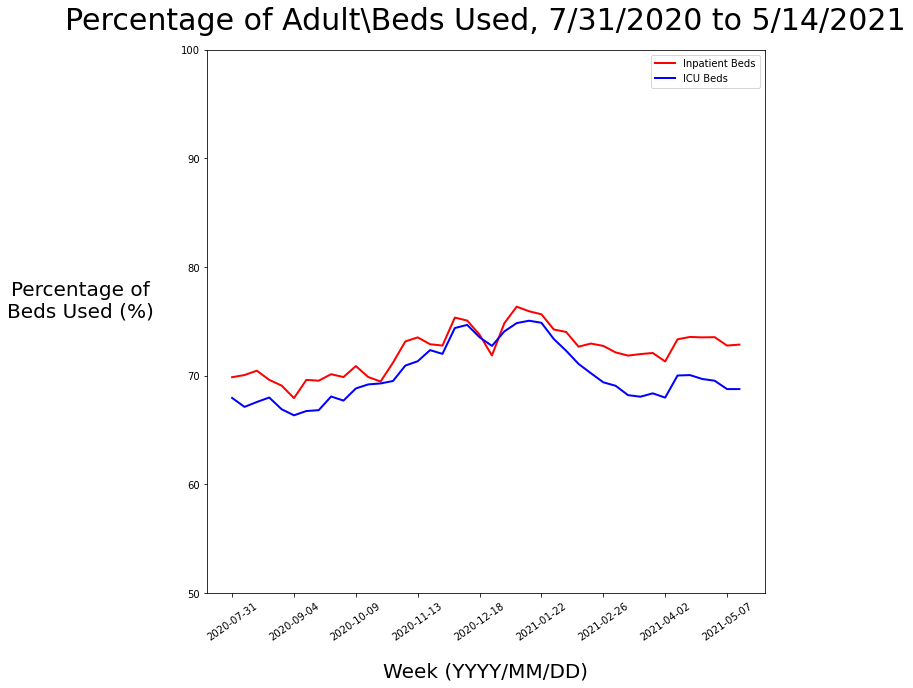

In [107]:
x = np.array(hospital_gb_sum.index)
y = (hospital_gb_sum['all_adult_hospital_inpatient_bed_occupied_7_day_sum'] 
     / hospital_gb_sum['all_adult_hospital_inpatient_beds_7_day_sum']) * 100
y_2 = (hospital_gb_sum['icu_beds_used_7_day_sum'] 
     / hospital_gb_sum['total_icu_beds_7_day_sum']) * 100
figure_size = (10,10)

fig, ax = plt.subplots(figsize=figure_size)
ax.plot(x, y, color='red', linewidth=2, label='Inpatient Beds')
ax.plot(x, y_2, color='blue', linewidth=2, label='ICU Beds')
ax.set_title('Percentage of Adult\Beds Used, 7/31/2020 to 5/14/2021', size=30, pad=20)
ax.set_xlabel('Week (YYYY/MM/DD)', size=20, labelpad=20)
ax.set_ylabel('Percentage of\nBeds Used (%)', rotation=0, size=20, labelpad=100)
ax.set_ylim(50, 100)
ax.set_xticks(x[::5])
ax.legend()
plt.xticks(rotation='35');

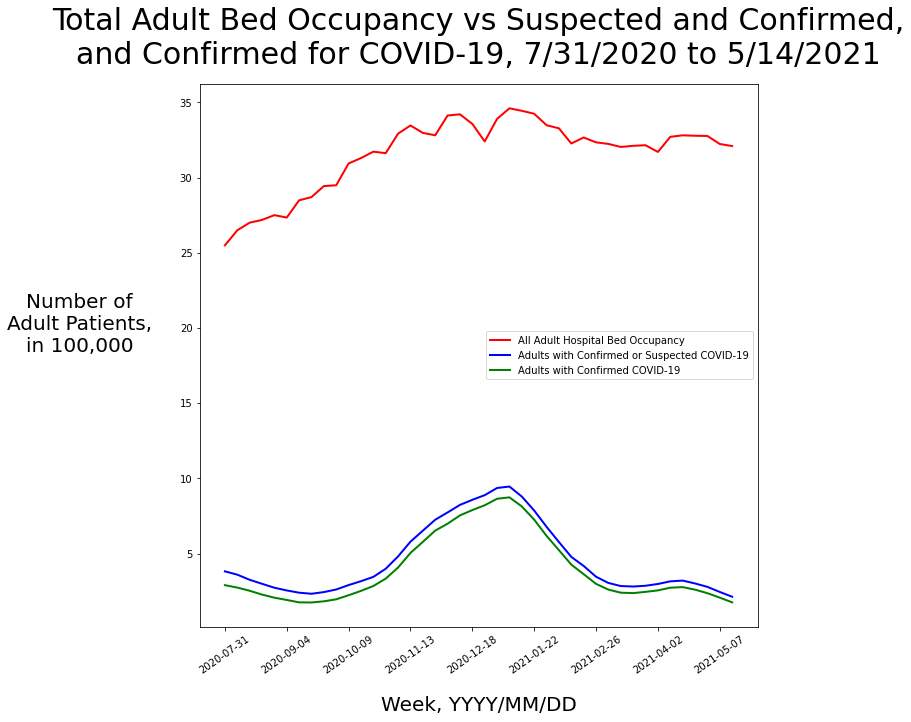

In [65]:
x = np.array(hospital_gb_sum.index)
y = hospital_gb_sum['all_adult_hospital_inpatient_bed_occupied_7_day_sum'] / 100000
y_2 = hospital_gb_sum['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'] / 100000
y_3 = hospital_gb_sum['total_adult_patients_hospitalized_confirmed_covid_7_day_sum'] / 100000

fig, ax = plt.subplots(figsize=figure_size)
ax.plot(x, y, color='red', label='All Adult Hospital Bed Occupancy', linewidth=2)
ax.plot(x, y_2, color='blue', label='Adults with Confirmed or Suspected COVID-19', linewidth=2)
ax.plot(x, y_3, color='green', label='Adults with Confirmed COVID-19', linewidth=2)
ax.set_title('Total Adult Bed Occupancy vs Suspected and Confirmed,\nand Confirmed for COVID-19, 7/31/2020 to 5/14/2021', size=30, pad=20)
ax.set_xlabel('Week (YYYY/MM/DD)', size=20, labelpad=20)
ax.set_ylabel('Number of\nAdult Patients,\nin 100,000', rotation=0, size=20, labelpad=100)
ax.set_xticks(x[::5])
ax.legend()
plt.xticks(rotation='35');

In [103]:
hospital_chosen_zip['total_adult_patients_hospitalized_confirmed_covid_7_day_sum'].idxmax()
# hospital_chosen_zip['inpatient_beds_used_7_day_sum'].max()


114914

In [105]:
hospital_chosen_zip[hospital_chosen_zip['zip'] == 92056]

,Unnamed: 0,collection_week,zip,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,...,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,icu_patients_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum,percent_inpatient_beds
3953,4355,2020-07-31,92056,2569.0,1806.0,1624.0,1134.0,1081.0,101.0,79.0,...,315.0,175.0,141.0,88.0,128.0,101.0,NaN,NaN,NaN,0.642857
8506,9253,2020-08-07,92056,2569.0,1806.0,1624.0,1149.0,1097.0,105.0,90.0,...,315.0,175.0,157.0,103.0,25.0,18.0,NaN,NaN,NaN,0.651361
13065,14097,2020-08-14,92056,2569.0,1806.0,1624.0,946.0,880.0,97.0,90.0,...,315.0,175.0,149.0,82.0,15.0,14.0,NaN,NaN,NaN,0.536281
17672,18968,2020-08-21,92056,2569.0,2429.0,1624.0,1003.0,920.0,124.0,108.0,...,315.0,175.0,171.0,88.0,32.0,28.0,NaN,NaN,NaN,0.568594
22325,23869,2020-08-28,92056,1558.0,1388.0,928.0,631.0,596.0,132.0,116.0,...,270.0,100.0,138.0,57.0,19.0,18.0,NaN,NaN,NaN,0.625992
27005,28785,2020-09-04,92056,2202.0,2082.0,1392.0,1014.0,952.0,124.0,117.0,...,270.0,150.0,142.0,80.0,28.0,27.0,NaN,NaN,NaN,0.670635
31711,33706,2020-09-11,92056,2202.0,2082.0,1392.0,1015.0,966.0,132.0,126.0,...,270.0,150.0,124.0,75.0,44.0,44.0,NaN,NaN,NaN,0.671296
36440,38638,2020-09-18,92056,2202.0,2082.0,1392.0,949.0,901.0,125.0,120.0,...,270.0,150.0,132.0,84.0,34.0,34.0,NaN,NaN,NaN,0.627646
41194,43572,2020-09-25,92056,2202.0,2082.0,1392.0,930.0,884.0,71.0,69.0,...,270.0,150.0,120.0,74.0,26.0,26.0,NaN,NaN,NaN,0.615079
45983,48537,2020-10-02,92056,1835.0,1735.0,1160.0,754.0,706.0,57.0,53.0,...,225.0,125.0,103.0,55.0,7.0,7.0,NaN,NaN,NaN,0.598413


In [104]:
hospital_chosen_zip.iloc[114914]
# hospital_chosen_zip[hospital_chosen_zip['inpatient_beds_used_7_day_sum'] == 17956]

Unnamed: 0                                                                           118624
collection_week                                                                  2021-01-08
zip                                                                                   92056
total_beds_7_day_sum                                                                   1946
all_adult_hospital_beds_7_day_sum                                                      1806
all_adult_hospital_inpatient_beds_7_day_sum                                            1624
inpatient_beds_used_7_day_sum                                                          1336
all_adult_hospital_inpatient_bed_occupied_7_day_sum                                    1281
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum              9080
total_adult_patients_hospitalized_confirmed_covid_7_day_sum                            9071
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum   

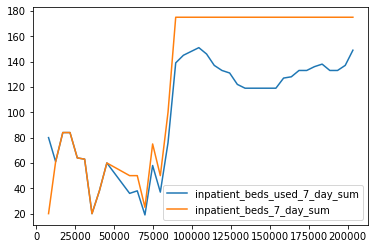

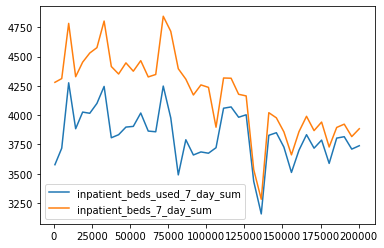

In [69]:

zip_codes = [96755, 76508]

for code in zip_codes:
    grouped_hospital.get_group(code)[['inpatient_beds_used_7_day_sum', 'inpatient_beds_7_day_sum']].plot()

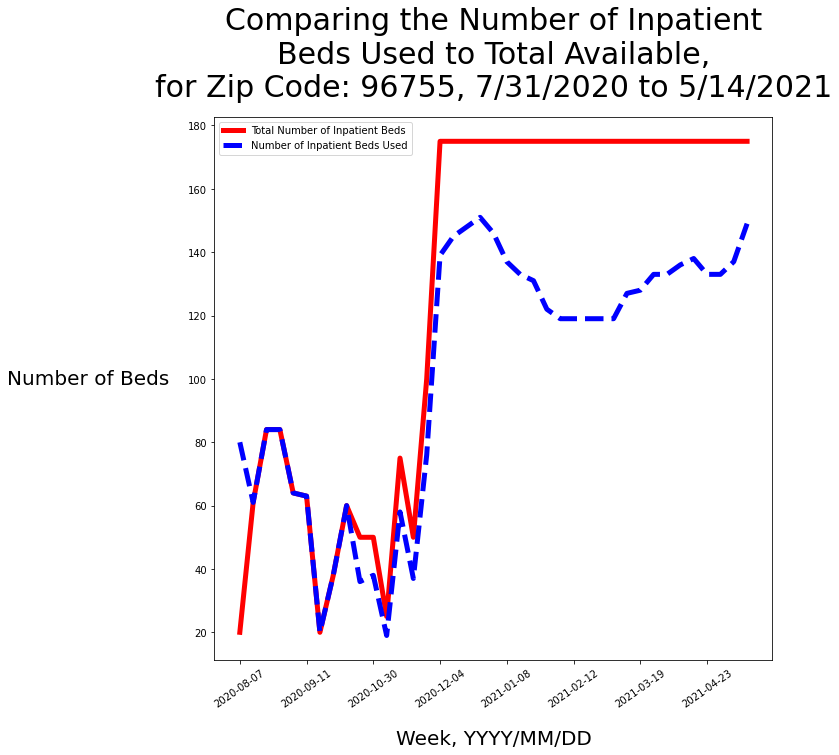

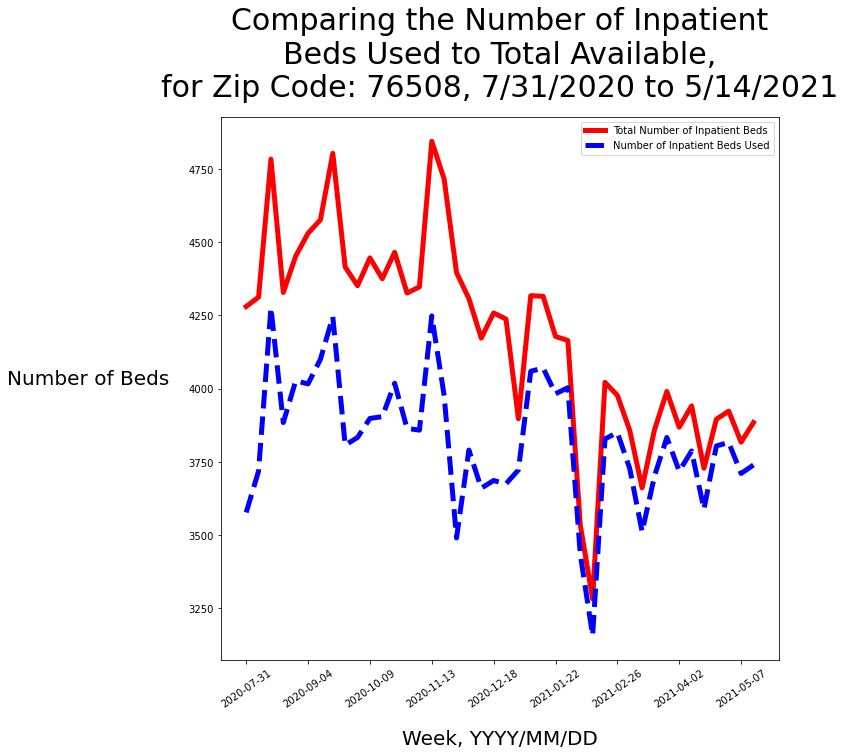

In [70]:
def line_beds_zip(code, figure_size):
    x = grouped_hospital.get_group(code)['collection_week']
    y = grouped_hospital.get_group(code)['inpatient_beds_7_day_sum']
    y_2 = grouped_hospital.get_group(code)['inpatient_beds_used_7_day_sum']

    fig, ax = plt.subplots(figsize=figure_size)
    ax.plot(x, y, color='red', label='Total Number of Inpatient Beds', linestyle='-', linewidth=3)
    ax.plot(x, y_2, color='blue', label='Number of Inpatient Beds Used', linestyle='--', linewidth=3)
    ax.set_title(f'Comparing the Number of Inpatient\nBeds Used to Total Available,\nfor Zip Code: {code}, 7/31/2020 to 5/14/2021', size=30, pad=20)
    ax.set_xlabel('Week (YYYY/MM/DD)', size=20, labelpad=20)
    ax.set_ylabel('Number of Beds', rotation=0, size=20, labelpad=100)
    ax.set_xticks(x[::5])
    ax.legend()
    plt.xticks(rotation='35');
    
for code in zip_codes:
    line_beds_zip(code, figure_size)

COVID confirmed/suspected seems to be under-reported, if it has been reported at all. Will be using inpatient_beds_used_7_day_sum moving forward 

In [71]:
hospital_chosen_zip['inpatient_beds_used_7_day_sum'].describe()
# grouped_hospital.aggregate(np.mean)['inpatient_beds_used_7_day_sum'].describe()

count    204439.000000
mean        709.409971
std        1121.410794
min           4.000000
25%          72.000000
50%         248.000000
75%         919.000000
max       17956.000000
Name: inpatient_beds_used_7_day_sum, dtype: float64

<AxesSubplot:>

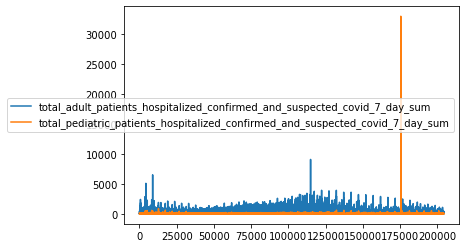

In [77]:
hospital_chosen_zip[['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
                     'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum']].plot()

<AxesSubplot:>

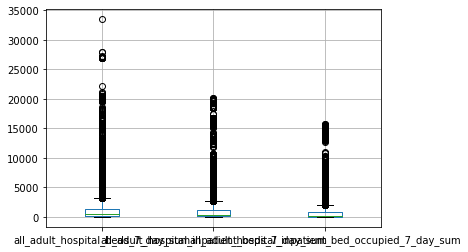

In [86]:
hospital_chosen_zip[['all_adult_hospital_beds_7_day_sum', 
                     'all_adult_hospital_inpatient_beds_7_day_sum',
                     'all_adult_hospital_inpatient_bed_occupied_7_day_sum']].boxplot()

<AxesSubplot:>

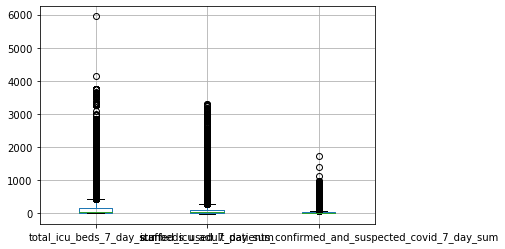

In [88]:
hospital_chosen_zip[['total_icu_beds_7_day_sum', 
                     'icu_beds_used_7_day_sum',
#                      'staffed_adult_icu_bed_occupancy_7_day_sum',
                     'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum']].boxplot()

In [90]:
zip_codes

[96755, 76508]

<AxesSubplot:>

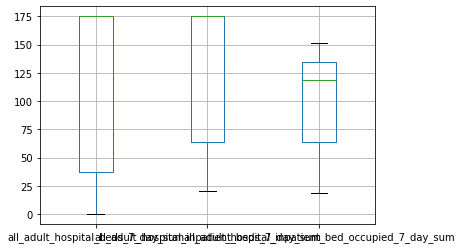

In [91]:
grouped_hospital.get_group(96755)[['all_adult_hospital_beds_7_day_sum', 
                                  'all_adult_hospital_inpatient_beds_7_day_sum',
                                  'all_adult_hospital_inpatient_bed_occupied_7_day_sum']].boxplot()

<AxesSubplot:>

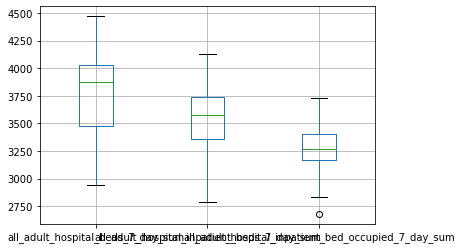

In [92]:
grouped_hospital.get_group(76508)[['all_adult_hospital_beds_7_day_sum', 
                                  'all_adult_hospital_inpatient_beds_7_day_sum',
                                  'all_adult_hospital_inpatient_bed_occupied_7_day_sum']].boxplot()

<AxesSubplot:>

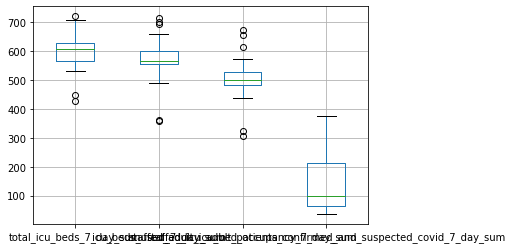

In [93]:
grouped_hospital.get_group(76508)[['total_icu_beds_7_day_sum', 
                     'icu_beds_used_7_day_sum',
                     'staffed_adult_icu_bed_occupancy_7_day_sum',
                     'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum']].boxplot()

<AxesSubplot:>

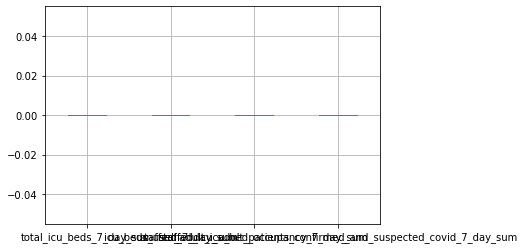

In [94]:
grouped_hospital.get_group(96755)[['total_icu_beds_7_day_sum', 
                     'icu_beds_used_7_day_sum',
                     'staffed_adult_icu_bed_occupancy_7_day_sum',
                     'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum']].boxplot()

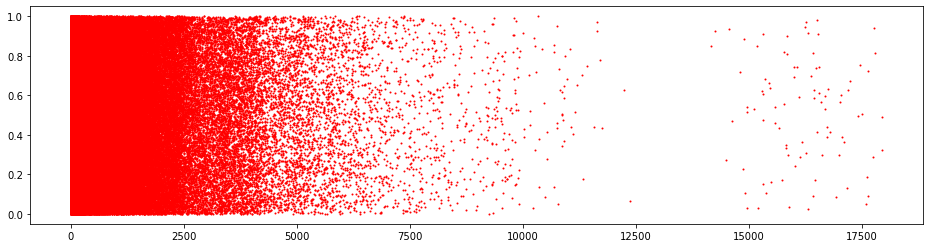

In [73]:
x = hospital_chosen_zip['inpatient_beds_used_7_day_sum']
jitter = np.random.random(len(x))

fig, ax = plt.subplots(figsize=(16, 4))
ax.scatter(x, jitter, s=1, c='red');

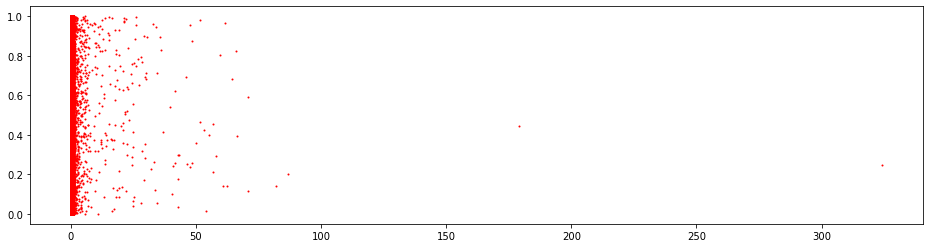

In [74]:
x = hospital_chosen_zip['inpatient_beds_used_7_day_sum'] / hospital_chosen_zip['inpatient_beds_7_day_sum']
jitter = np.random.random(len(x))

fig, ax = plt.subplots(figsize=(16, 4))
ax.scatter(x, jitter, s=1, c='red');

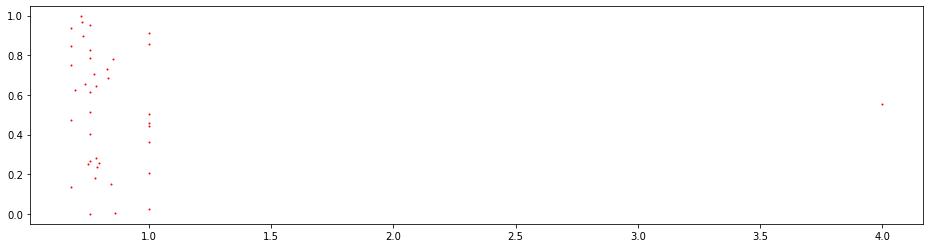

In [95]:
x = grouped_hospital.get_group(96755)['inpatient_beds_used_7_day_sum'] / grouped_hospital.get_group(96755)['inpatient_beds_7_day_sum']
jitter = np.random.random(len(x))

fig, ax = plt.subplots(figsize=(16, 4))
ax.scatter(x, jitter, s=1, c='red');

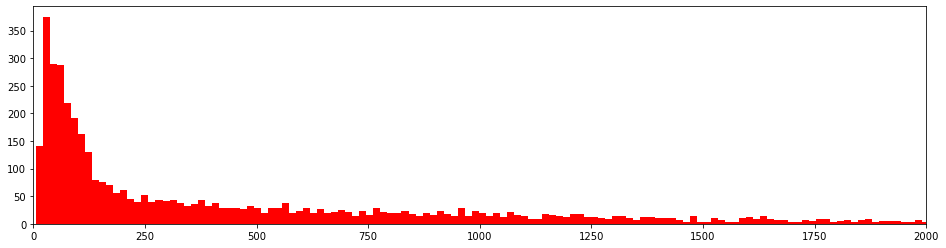

In [75]:
x = grouped_hospital.aggregate(np.mean)['inpatient_beds_used_7_day_sum']
jitter = np.random.random(len(x))

fig, ax = plt.subplots(figsize=(16, 4))
ax.hist(x, bins=1000, color='red')
ax.set_xlim(0, 2000);

''

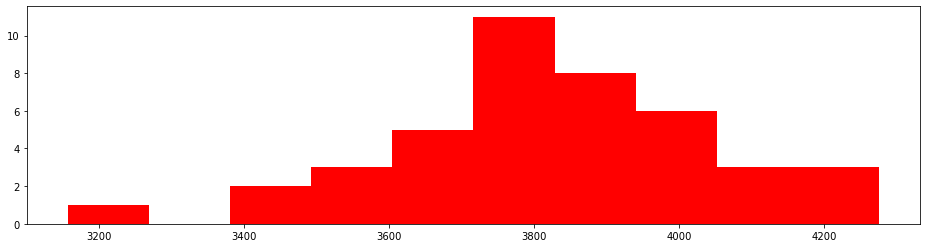

In [100]:
x = grouped_hospital.get_group(76508)['inpatient_beds_used_7_day_sum']
jitter = np.random.random(len(x))

fig, ax = plt.subplots(figsize=(16, 4))
ax.hist(x, color='red')
;

''

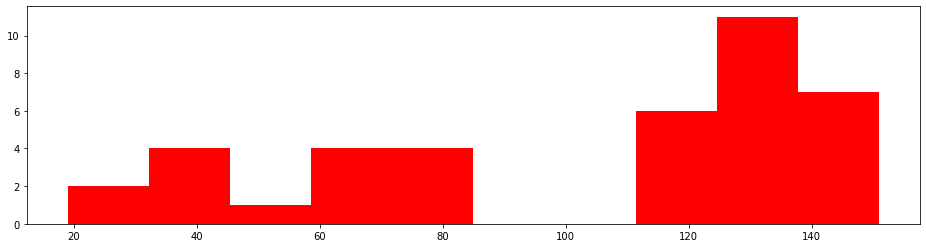

In [101]:
x = grouped_hospital.get_group(96755)['inpatient_beds_used_7_day_sum']
jitter = np.random.random(len(x))

fig, ax = plt.subplots(figsize=(16, 4))
ax.hist(x, color='red')
;